In [1]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from statsmodels.tsa.stattools import acovf
from matplotlib.ticker import FormatStrFormatter
import datetime as dt
from scipy import signal
from scipy.fft import fft, ifft
from matplotlib.ticker import AutoMinorLocator
import math
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm

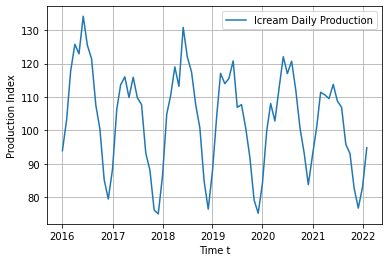

In [2]:
dicfn = pd.read_csv('IPN31152N_Fred_Industrial Production Manufacturing Non-Durable Goods Ice Cream and Frozen Dessert.csv')
dicfn.DATE = pd.to_datetime(dicfn.DATE)
plt.plot(dicfn.DATE[dicfn.DATE.dt.year > 2015],dicfn.IPN31152N[dicfn.DATE.dt.year > 2015])
plt.ylabel('Production Index')
plt.xlabel('Time t')
plt.legend(['Icream Daily Production'])
plt.grid(True)
t_date = dicfn.DATE[dicfn.DATE.dt.year > 2015]
x = dicfn.IPN31152N[dicfn.DATE.dt.year > 2015].values

/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ipykernel_17432/2484997955.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 720x504 with 0 Axes>

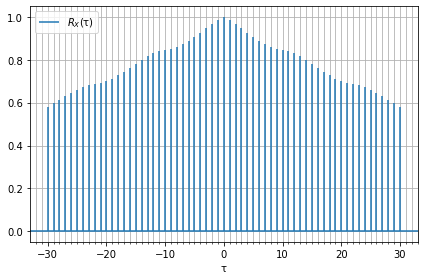

In [3]:
plt.figure(figsize=(10, 7))
fig, ax = plt.subplots()
ax.acorr(x,maxlags = 30)
minor_locator = AutoMinorLocator(10)
ax.xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor')
plt.legend(['$R_X$(\u03C4)'],loc='upper left')
plt.xlabel('\u03C4')
# plt.ylabel('Power')
ax.grid(True, which='both')
plt.tight_layout()
fig.savefig('Stochastic_Autocorrelation.png')
fig.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 74, using nperseg = 74
  warnings.warn('nperseg = {0:d} is greater than input length '
/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ipykernel_17432/199061147.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 720x504 with 0 Axes>

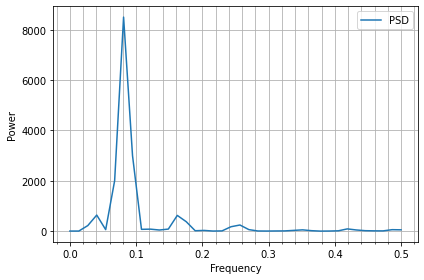

In [4]:
freqs, psd = signal.welch(x)
plt.figure(figsize=(10, 7))
fig, ax = plt.subplots()
ax.plot(freqs, psd)
minor_locator = AutoMinorLocator(5)
ax.xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor')
plt.legend(['PSD'])
plt.xlabel('Frequency')
plt.ylabel('Power')
ax.grid(True, which='both')
plt.tight_layout()
fig.savefig('Stochastic_PSD.png')
fig.show()


### Whole Food

We can see from the original graph that it is a non-stationary time series, the general trend is going down before time 60 and going up after that time point. The seasonality is not quite obvious on this graph. From the autocorrelation and psd graph, I can confidently say that there is no seasonality in this time-series.

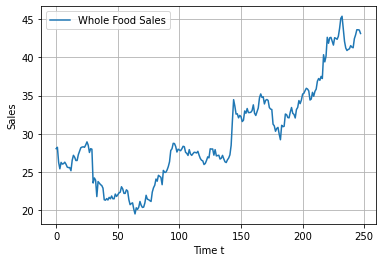

In [14]:
wh_df = pd.read_excel('WholeFood.xlsx')
plt.plot(wh_df)
plt.ylabel('Sales')
plt.xlabel('Time t')
plt.legend(['Whole Food Sales'])
plt.grid(True)

/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ipykernel_17432/3603344068.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 720x504 with 0 Axes>

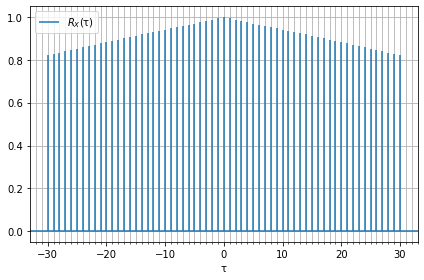

In [15]:
x = wh_df.Sales
plt.figure(figsize=(10, 7))
fig, ax = plt.subplots()
ax.acorr(x,maxlags = 30)
minor_locator = AutoMinorLocator(10)
ax.xaxis.set_minor_locator(minor_locator)

plt.grid(which='minor')
plt.legend(['$R_X$(\u03C4)'],loc='upper left')
plt.xlabel('\u03C4')
# plt.ylabel('Power')
ax.grid(True, which='both')
plt.tight_layout()
fig.savefig('Stochastic_Autocorrelation.png')
fig.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 248, using nperseg = 248
  warnings.warn('nperseg = {0:d} is greater than input length '
/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ipykernel_17432/2043654894.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1440x1080 with 0 Axes>

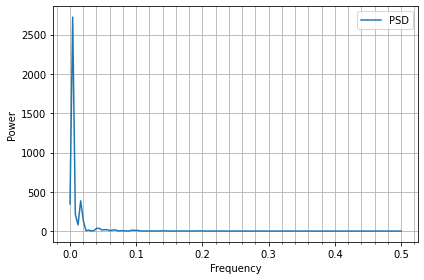

In [20]:
freqs, psd = signal.welch(x)
plt.figure(figsize=(20, 15))
fig, ax = plt.subplots()
ax.plot(freqs, psd)
minor_locator = AutoMinorLocator(5)
ax.xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor')
plt.legend(['PSD'])
plt.xlabel('Frequency')
plt.ylabel('Power')
ax.grid(True, which='both')
plt.tight_layout()
fig.savefig('Stochastic_PSD.png')
fig.show()

### Pharmaceutical

I can tell from the original graph that it is quite like a stationary time-series. From the autocorrelation and psd graph below, I still cannot distinguish any seasonality.

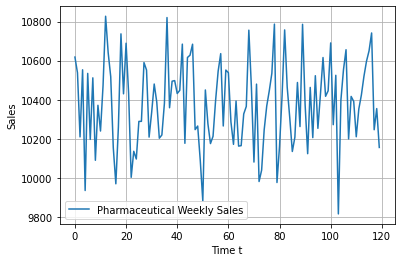

In [25]:
ph_df = pd.read_excel('Pharmaceutical.xlsx')
plt.plot(wh_df)
plt.ylabel('Sales')
plt.xlabel('Time t')
plt.legend(['Pharmaceutical Weekly Sales'])
plt.grid(True)

/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ipykernel_17432/3183731262.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 720x504 with 0 Axes>

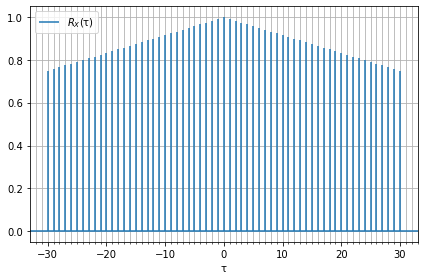

In [26]:
x = ph_df.Weekly_Sales
plt.figure(figsize=(10, 7))
fig, ax = plt.subplots()
ax.acorr(x,maxlags = 30)
minor_locator = AutoMinorLocator(10)
ax.xaxis.set_minor_locator(minor_locator)

plt.grid(which='minor')
plt.legend(['$R_X$(\u03C4)'],loc='upper left')
plt.xlabel('\u03C4')
# plt.ylabel('Power')
ax.grid(True, which='both')
plt.tight_layout()
fig.savefig('Stochastic_Autocorrelation.png')
fig.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 120, using nperseg = 120
  warnings.warn('nperseg = {0:d} is greater than input length '
/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ipykernel_17432/2043654894.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1440x1080 with 0 Axes>

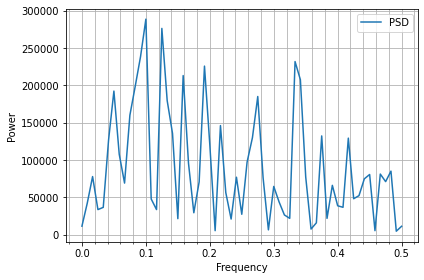

In [27]:
freqs, psd = signal.welch(x)
plt.figure(figsize=(20, 15))
fig, ax = plt.subplots()
ax.plot(freqs, psd)
minor_locator = AutoMinorLocator(5)
ax.xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor')
plt.legend(['PSD'])
plt.xlabel('Frequency')
plt.ylabel('Power')
ax.grid(True, which='both')
plt.tight_layout()
fig.savefig('Stochastic_PSD.png')
fig.show()

### Viscosity

The original graph does not tell much about the trend and seasonality. Although the psd graph has multiple peaks, I can find no periodic pattern from the autocorrelation graph. s

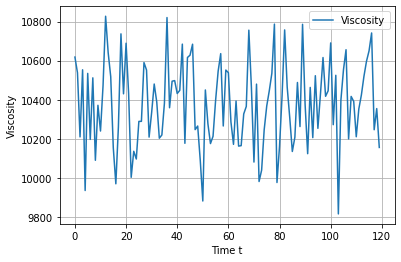

In [31]:
vis_df = pd.read_excel('Viscosity.xlsx')
plt.plot(wh_df)
plt.ylabel('Viscosity')
plt.xlabel('Time t')
plt.legend(['Viscosity'])
plt.grid(True)

/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ipykernel_17432/575056775.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 720x504 with 0 Axes>

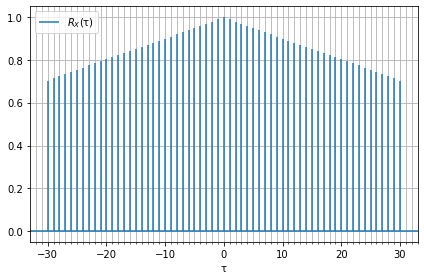

In [32]:
x = ph_df.Viscosity
plt.figure(figsize=(10, 7))
fig, ax = plt.subplots()
ax.acorr(x,maxlags = 30)
minor_locator = AutoMinorLocator(10)
ax.xaxis.set_minor_locator(minor_locator)

plt.grid(which='minor')
plt.legend(['$R_X$(\u03C4)'],loc='upper left')
plt.xlabel('\u03C4')
# plt.ylabel('Power')
ax.grid(True, which='both')
plt.tight_layout()
fig.savefig('Stochastic_Autocorrelation.png')
fig.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 100, using nperseg = 100
  warnings.warn('nperseg = {0:d} is greater than input length '
/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ipykernel_17432/2043654894.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1440x1080 with 0 Axes>

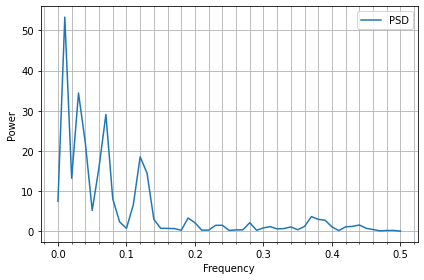

In [33]:
freqs, psd = signal.welch(x)
plt.figure(figsize=(20, 15))
fig, ax = plt.subplots()
ax.plot(freqs, psd)
minor_locator = AutoMinorLocator(5)
ax.xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor')
plt.legend(['PSD'])
plt.xlabel('Frequency')
plt.ylabel('Power')
ax.grid(True, which='both')
plt.tight_layout()
fig.savefig('Stochastic_PSD.png')
fig.show()